In [20]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [21]:
video_path = r'032fa596158155a8c93f8fe5747fb80f.mp4'
capture = cv2.VideoCapture(video_path)

count = 0
frame1, frame2 = None, None
while True:
    ret, frame = capture.read()
    count += 1
    if not ret:
        break
    if count == 100:
        frame1 = frame
    if count == 3000:
        frame2 = frame
    if count >= 3000:
        break
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

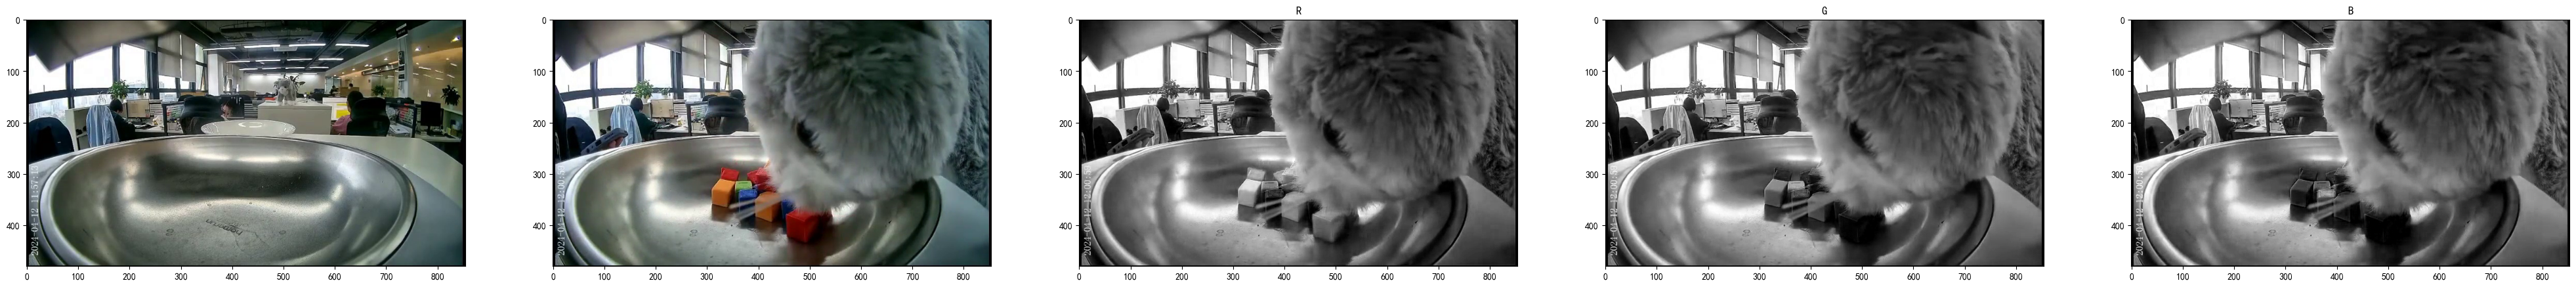

In [22]:


plt.figure(figsize=(50,5))
plt.subplot(151)
plt.imshow(frame1)
plt.subplot(152)
plt.imshow(frame2)

plt.subplot(153)
plt.imshow(frame2[:,:,0],'gray')
plt.title("R")

plt.subplot(154)
plt.imshow(frame2[:,:,1],'gray')
plt.title("G")

plt.subplot(155)
plt.imshow(frame2[:,:,2],'gray')
plt.title("B")
plt.show()

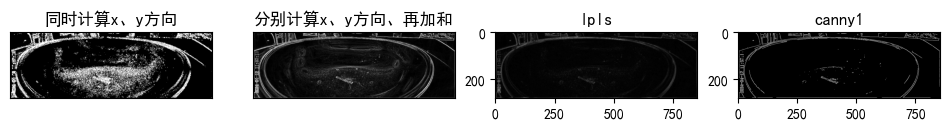

In [23]:
#同时计算x、y方向

image = frame1[200:,:,:]
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sobelxy1 = cv2.Sobel(image,cv2.CV_64F,1,1,ksize=3)        
sobelxy1 = cv2.convertScaleAbs(sobelxy1) > 10
#分别计算x、y方向
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy2 = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

plt.rcParams['font.sans-serif'] = ['SimHei']        #文字字体为黑体
plt.figure(figsize=(12,5))
plt.subplot(141)
plt.imshow(sobelxy1,cmap='gray')
plt.title('同时计算x、y方向')
plt.xticks([]),plt.yticks([])

plt.subplot(142)
plt.imshow(sobelxy2,cmap='gray')
plt.title('分别计算x、y方向、再加和')
plt.xticks([]),plt.yticks([])



src = cv2.GaussianBlur(image, (0, 0), 1)
dst = cv2.Laplacian(src, cv2.CV_32F, ksize=1, delta=0)
lpls1 = cv2.convertScaleAbs(dst)

plt.subplot(143)
plt.imshow(lpls1, cmap="gray")
plt.title("lpls")

Canny1=cv2.Canny(image,220,250) 

plt.subplot(144)
plt.imshow(Canny1, cmap="gray")
plt.title("canny1")
plt.show()


In [24]:
cv2.imwrite('mask.jpg',dst)

True

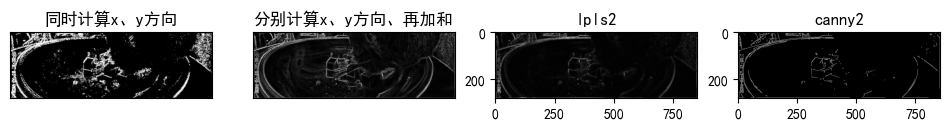

In [25]:

image = frame2[200:,:,:]
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sobelxy1 = cv2.Sobel(image,cv2.CV_64F,1,1,ksize=3)        
sobelxy1 = cv2.convertScaleAbs(sobelxy1) > 10
#分别计算x、y方向
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy2 = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

plt.rcParams['font.sans-serif'] = ['SimHei']        #文字字体为黑体
plt.figure(figsize=(12,5))
plt.subplot(141)

plt.imshow(sobelxy1,cmap='gray')
plt.title('同时计算x、y方向')
plt.xticks([]),plt.yticks([])

plt.subplot(142)
plt.imshow(sobelxy2,cmap='gray')
plt.title('分别计算x、y方向、再加和')
plt.xticks([]),plt.yticks([])



src = cv2.GaussianBlur(image, (0, 0), 1)
dst = cv2.Laplacian(src, cv2.CV_32F, ksize=3, delta=0)
lpls2 = cv2.convertScaleAbs(dst)

plt.subplot(143)
plt.imshow(lpls2, cmap="gray")
plt.title("lpls2")

Canny2=cv2.Canny(image,220,250) 
plt.subplot(144)
plt.imshow(Canny2, cmap="gray")
plt.title("canny2")
plt.show()


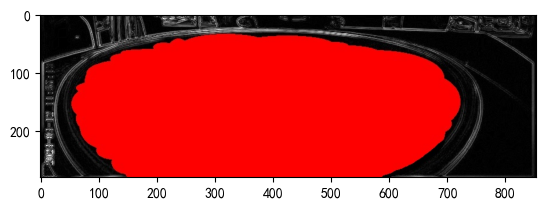

In [26]:
mask = cv2.imread("mask_red.jpg")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask)
plt.show()

In [27]:
print(mask.shape)
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j,0] >= 240 and mask[i,j,1] <= 10 and mask[i,j,2] <= 10:
            mask[i,j,0] = 255
            mask[i,j,1] = 255
            mask[i,j,2] = 255
            continue
        else:
            mask[i,j,0] = 0
            mask[i,j,1] = 0
            mask[i,j,2] = 0

(280, 854, 3)


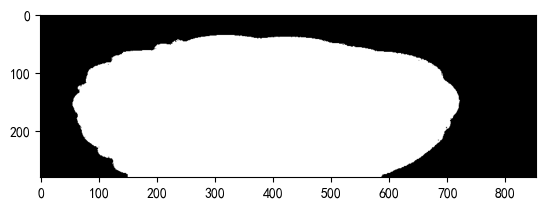

In [28]:
plt.imshow(mask)
plt.show()

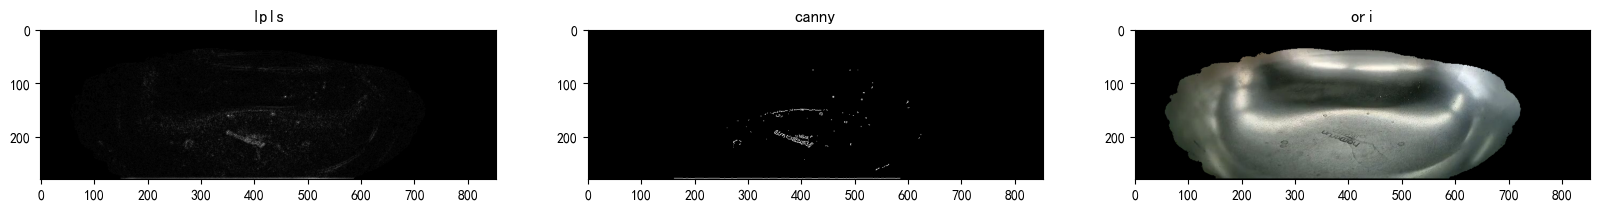

In [29]:
plt.figure(figsize=(20,10))
image1 = lpls1
plt.subplot(131)
image1 = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(image1, 'gray')
plt.title('lpls')

plt.subplot(132)
image1 = Canny1
image1 = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(image1, 'gray')
plt.title('canny')

plt.subplot(133)
image1 = frame1[200:,:,:]
image1 = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(image1)
plt.title('ori')
plt.show()

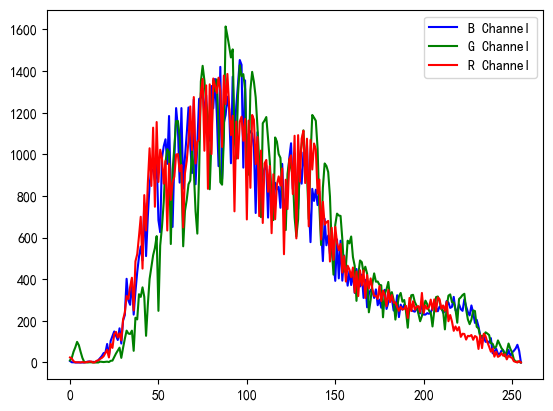

In [30]:
# plt.imshow(image1)
# plt.show()
#计算直方图（彩图）

    # 1、读取图片


    # 设置颜色通道
color = ["b", "g", "r"]
ori1 = image1
    # 2、获取直方图
for i, c in enumerate(color):           #i是索引，c是内容
    hist = cv2.calcHist([image1], [i], None, [256], [1, 256])
    plt.plot(hist, color=c)
 
    # 3、直方图展示
plt.legend(["B Channel", "G Channel", "R Channel"])     #批注
plt.show()

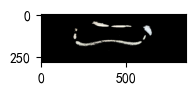

In [31]:
plt.subplot(131)
mask_ori1 = np.zeros_like(image1[:,:,0])
mask_ori1[np.where(image1[:,:,0]>200)] = 255
ori1_result = cv2.bitwise_and(ori1, ori1, mask=mask_ori1)
plt.imshow(ori1_result)
plt.show()

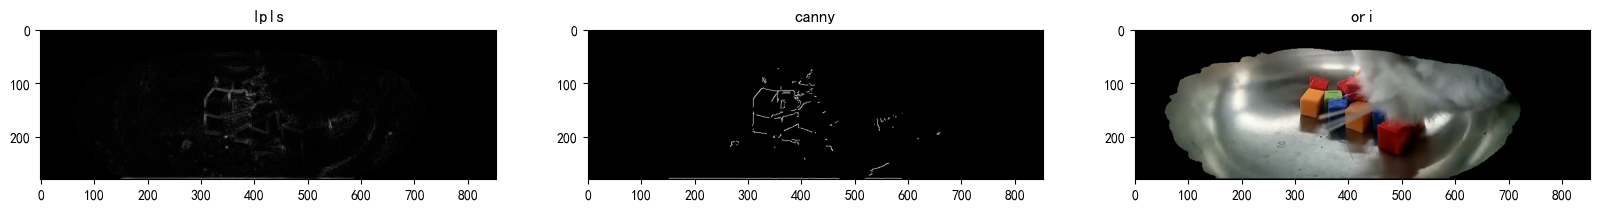

In [32]:
plt.figure(figsize=(20,10))

image1 = lpls2
plt.subplot(131)
image1 = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(image1, 'gray')
plt.title('lpls')

image1 = Canny2
plt.subplot(132)
Canny2_with_mask = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(Canny2_with_mask, 'gray')
plt.title('canny')

plt.subplot(133)
image1 = frame2[200:,:,:]
ori_image_with_mask = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(ori_image_with_mask)
plt.title('ori')
plt.show()

midval: 93.0
midval: 97.0
midval: 92.0


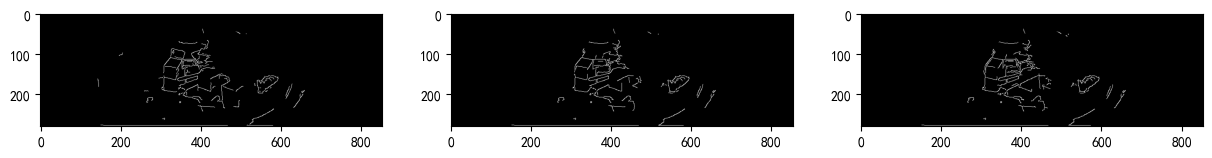

In [33]:
image1 = frame2[200:,:,:]
image1_GaussianBlur = cv2.GaussianBlur(image1, (5,5), 0)
# 求自适应阈值的最小和最大值
def GetMatMinMaxThreshold(img, sigma=0.2):

    midval = np.median(img)
    print("midval:", midval)
    # 计算低阈值
    minval = int((1.0 - sigma) * midval)
    # 计算高阈值
    maxval = int((1.0 + sigma) * midval)
    return minval ,maxval

plt.figure(figsize=(15,5))
for i in range(3):
    image_single_channel = image1_GaussianBlur[:,:,i]
    minval, maxval = GetMatMinMaxThreshold(image_single_channel)   
    Canny2_image_single_channel=cv2.Canny(image_single_channel,minval,maxval) 
    Canny2_image_single_channel = cv2.bitwise_and(Canny2_image_single_channel, Canny2_image_single_channel, mask=mask[:,:,0])
    plt.subplot(130+i+1)
    plt.imshow(Canny2_image_single_channel, 'gray')
plt.show()



In [34]:
import numpy as np
np.median(np.array([1,2,3,2,3])),np.median(image1[:,:,1]),np.median(image1[:,:,2])

(2.0, 97.0, 92.0)

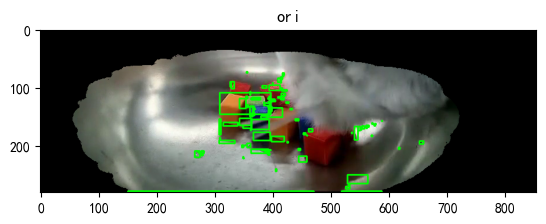

In [35]:
contours, hierarchy = cv2.findContours(Canny2_with_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
ori_image_with_mask_temp = np.copy(ori_image_with_mask)
for c in contours:
    # 找到边界坐标
    x, y, w, h = cv2.boundingRect(c)  # 计算点集最外面的矩形边界
    cv2.rectangle(ori_image_with_mask_temp, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # 找面积最小的矩形
    rect = cv2.minAreaRect(c)
    # 得到最小矩形的坐标
    box = cv2.boxPoints(rect)
    # 标准化坐标到整数
    box = np.int0(box)
    # 画出边界
    # cv2.drawContours(ori_image_with_mask, [box], 0, (0, 0, 255), 3)
    # 计算最小封闭圆的中心和半径
    (x, y), radius = cv2.minEnclosingCircle(c)
    # 换成整数integer
    center = (int(x),int(y))
    radius = int(radius)
    # 画圆
    # cv2.circle(ori_image_with_mask, center, radius, (0, 255, 0), 2)
plt.imshow(ori_image_with_mask_temp)
plt.title('ori')
plt.show()

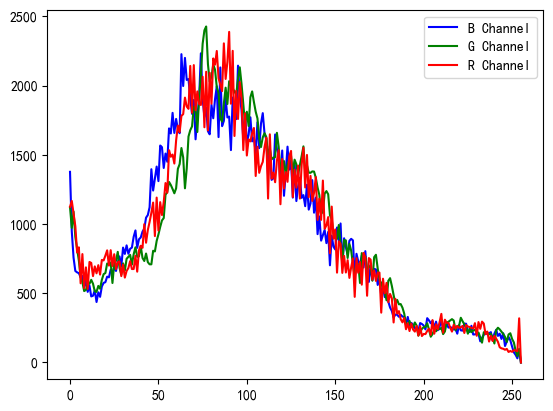

In [36]:
# 设置颜色通道
color = ["b", "g", "r"]

# 2、获取直方图
for i, c in enumerate(color):           #i是索引，c是内容
    hist = cv2.calcHist([image1], [i], None, [256], [1, 256])
    plt.plot(hist, color=c)
 
    # 3、直方图展示
plt.legend(["B Channel", "G Channel", "R Channel"])     #批注
plt.show()

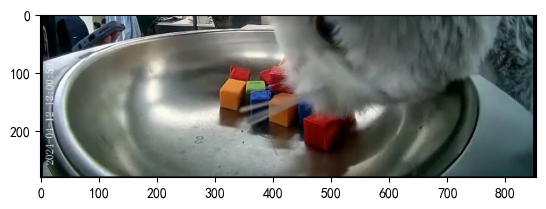

In [37]:
plt.imshow(image1)
plt.show()

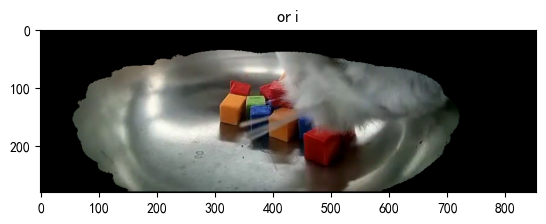

In [39]:
plt.imshow(ori_image_with_mask)
plt.title('ori')
plt.show()

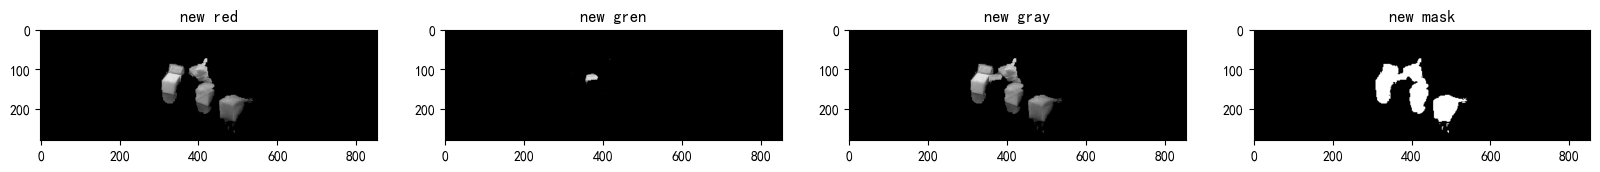

In [101]:
new_image = np.zeros_like(ori_image_with_mask)

def calculate_ratio(r, g, b):
    if b > (r - 10):
        return 0, 0
    
    if max([r,g,b]) - min([r,g,b]) < 35:
        return 0, 0
    ratio = max(min(r - g, 17) + 3, 0) / 20
    return ratio, 1 - ratio
mask_new_image = np.zeros_like(ori_image_with_mask)
for row in range(ori_image_with_mask.shape[0]):
    for col in range(ori_image_with_mask.shape[1]):
        r, g, b = list(map(lambda x : int(x),[ori_image_with_mask[row,col,0],ori_image_with_mask[row,col,1],ori_image_with_mask[row,col,2]]))
        
        r_part = r * calculate_ratio(r, g, b)[0]
        g_part = g * calculate_ratio(r, g, b)[1]
        new_image[row, col, 2] = max(0, min(255, int(r_part + g_part)))
        new_image[row, col, 1] = max(0, min(255, int(g_part)))
        new_image[row, col, 0] = max(0, min(255, int(r_part)))
        if max(0, min(255, int(r_part + g_part))) > 20:
            mask_new_image[row, col, 0] = 255
plt.figure(figsize=(20,7))
plt.subplot(141)
plt.imshow(new_image[:,:,0], 'gray')
plt.title('new red')
plt.subplot(142)
plt.imshow(new_image[:,:,1], 'gray')
plt.title('new gren')
plt.subplot(143)
plt.imshow(new_image[:,:,2], 'gray')
plt.title('new gray')
plt.subplot(144)
plt.imshow(mask_new_image[:,:,0], 'gray')
plt.title('new mask')
plt.show()

midval: 93.0
midval: 97.0
midval: 92.0


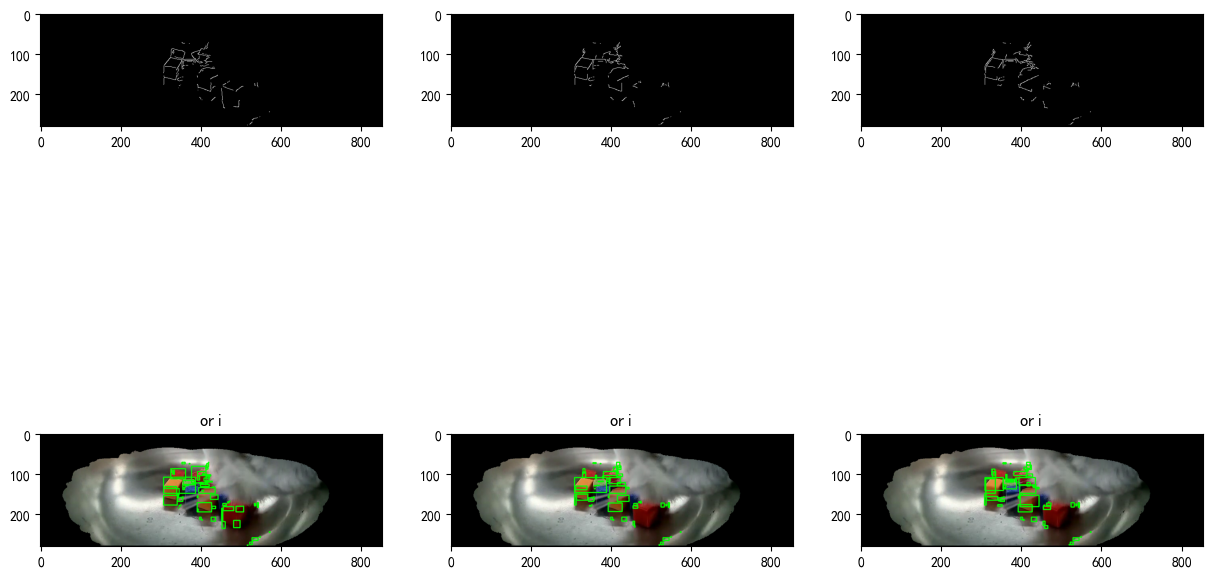

In [82]:
image1 = frame2[200:,:,:]
image1_GaussianBlur = cv2.GaussianBlur(image1, (5,5), 0)
# 求自适应阈值的最小和最大值
def GetMatMinMaxThreshold(img, sigma=0.2):

    midval = np.median(img)
    print("midval:", midval)
    # 计算低阈值
    minval = int((1.0 - sigma) * midval)
    # 计算高阈值
    maxval = int((1.0 + sigma) * midval)
    return minval ,maxval

plt.figure(figsize=(15,10))
for i in range(3):
    image_single_channel = image1_GaussianBlur[:,:,i]
    minval, maxval = GetMatMinMaxThreshold(image_single_channel)   
    Canny2_image_single_channel=cv2.Canny(image_single_channel,minval,maxval) 
    Canny2_image_single_channel = cv2.bitwise_and(Canny2_image_single_channel, Canny2_image_single_channel, mask=mask_new_image[:,:,0])
    plt.subplot(230+i+1)
    plt.imshow(Canny2_image_single_channel, 'gray')

    contours, hierarchy = cv2.findContours(Canny2_image_single_channel, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    ori_image_with_mask_temp = np.copy(ori_image_with_mask)

    for c in contours:
        # 找到边界坐标
        x, y, w, h = cv2.boundingRect(c)  # 计算点集最外面的矩形边界

        small_box = ori_image_with_mask_temp[x:x+w,y:y+h,:]

        cv2.rectangle(ori_image_with_mask_temp, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # 找面积最小的矩形
        rect = cv2.minAreaRect(c)
        # 得到最小矩形的坐标
        box = cv2.boxPoints(rect)
        # 标准化坐标到整数
        box = np.int0(box)
        # 画出边界
        # cv2.drawContours(ori_image_with_mask, [box], 0, (0, 0, 255), 3)
        # 计算最小封闭圆的中心和半径
        (x, y), radius = cv2.minEnclosingCircle(c)
        # 换成整数integer
        center = (int(x),int(y))
        radius = int(radius)
        # 画圆
        # cv2.circle(ori_image_with_mask, center, radius, (0, 255, 0), 2)
    plt.subplot(230+i+4)
    plt.imshow(ori_image_with_mask_temp)
    plt.title('ori')
plt.show()


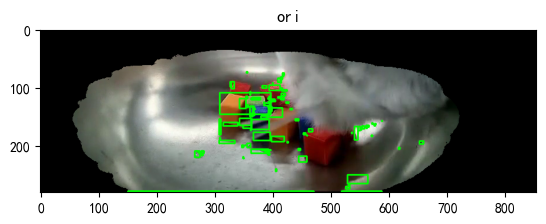

In [102]:
contours, hierarchy = cv2.findContours(Canny2_with_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
ori_image_with_mask_temp = np.copy(ori_image_with_mask)
for c in contours:
    # 找到边界坐标
    x, y, w, h = cv2.boundingRect(c)  # 计算点集最外面的矩形边界
    cv2.rectangle(ori_image_with_mask_temp, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # 找面积最小的矩形
    rect = cv2.minAreaRect(c)
    # 得到最小矩形的坐标
    box = cv2.boxPoints(rect)
    # 标准化坐标到整数
    box = np.int0(box)
    # 画出边界
    # cv2.drawContours(ori_image_with_mask, [box], 0, (0, 0, 255), 3)
    # 计算最小封闭圆的中心和半径
    (x, y), radius = cv2.minEnclosingCircle(c)
    # 换成整数integer
    center = (int(x),int(y))
    radius = int(radius)
    # 画圆
    # cv2.circle(ori_image_with_mask, center, radius, (0, 255, 0), 2)
plt.imshow(ori_image_with_mask_temp)
plt.title('ori')
plt.show()

uint8 uint8


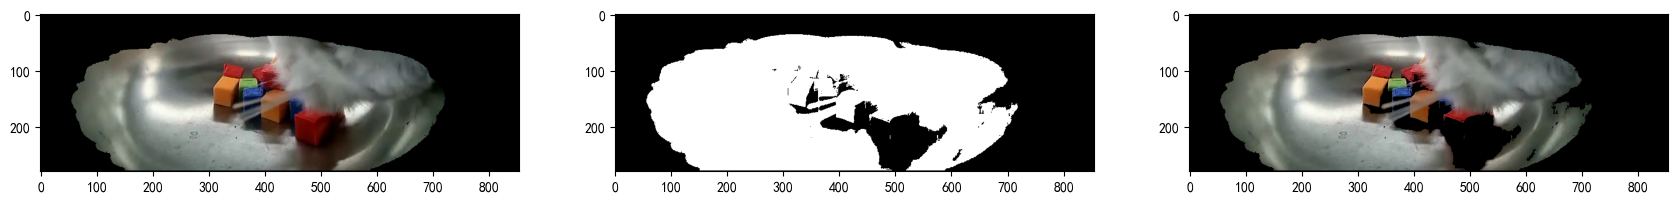

In [103]:
ori_image_std = np.copy(ori_image_with_mask)
img_sum = np.sum(ori_image_std, axis=2)
std_img = np.std(ori_image_std)

std_img = np.where(img_sum<150, 0, 255)
std_img = std_img.astype(np.uint8)
# _,std_img = cv2.threshold(std_img, 200,255,cv2.THRESH_BINARY)
print(std_img.dtype, ori_image_with_mask.dtype)
image_remove_shaddow = cv2.bitwise_and(ori_image_with_mask, ori_image_with_mask, mask=std_img)
plt.figure(figsize=(21,7))
plt.subplot(131)
plt.imshow(ori_image_with_mask)
plt.subplot(132)
plt.imshow(std_img, 'gray')
plt.subplot(133)
plt.imshow(image_remove_shaddow)
plt.show()

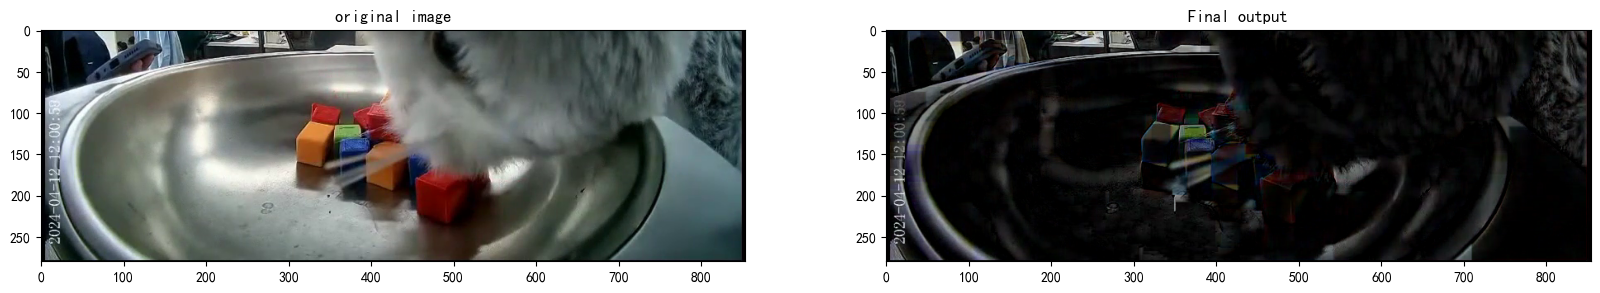

In [110]:
def max_filtering(N, I_temp):
    wall = np.full((I_temp.shape[0]+(N//2)*2, I_temp.shape[1]+(N//2)*2), -1)
    wall[(N//2):wall.shape[0]-(N//2), (N//2):wall.shape[1]-(N//2)] = I_temp.copy()
    temp = np.full((I_temp.shape[0]+(N//2)*2, I_temp.shape[1]+(N//2)*2), -1)
    for y in range(0,wall.shape[0]):
        for x in range(0,wall.shape[1]):
            if wall[y,x]!=-1:
                window = wall[y-(N//2):y+(N//2)+1,x-(N//2):x+(N//2)+1]
                num = np.amax(window)
                temp[y,x] = num
    A = temp[(N//2):wall.shape[0]-(N//2), (N//2):wall.shape[1]-(N//2)].copy()
    return A


def min_filtering(N, A):
    wall_min = np.full((A.shape[0]+(N//2)*2, A.shape[1]+(N//2)*2), 300)
    wall_min[(N//2):wall_min.shape[0]-(N//2), (N//2):wall_min.shape[1]-(N//2)] = A.copy()
    temp_min = np.full((A.shape[0]+(N//2)*2, A.shape[1]+(N//2)*2), 300)
    for y in range(0,wall_min.shape[0]):
        for x in range(0,wall_min.shape[1]):
            if wall_min[y,x]!=300:
                window_min = wall_min[y-(N//2):y+(N//2)+1,x-(N//2):x+(N//2)+1]
                num_min = np.amin(window_min)
                temp_min[y,x] = num_min
    B = temp_min[(N//2):wall_min.shape[0]-(N//2), (N//2):wall_min.shape[1]-(N//2)].copy()
    return B


#B is the filtered image and I is the original image
def background_subtraction(I, B):
    O = I - B
    norm_img = cv2.normalize(O, None, 0,255, norm_type=cv2.NORM_MINMAX)
    return norm_img

def min_max_filtering(M, N, I):
    if M == 0:
        #max_filtering
        A = max_filtering(N, I)
        #min_filtering
        B = min_filtering(N, A)
        #subtraction
        normalised_img = background_subtraction(I, B)
    elif M == 1:
        #min_filtering
        A = min_filtering(N, I)
        #max_filtering
        B = max_filtering(N, A)
        #subtraction
        normalised_img = background_subtraction(I, B)
    return normalised_img



def remove_shadow(P):
    b, g, r = cv2.split(P)
    b_O_P = min_max_filtering(M=1, N=20, I=b)
    g_O_P = min_max_filtering(M=1, N=20, I=g)
    r_O_P = min_max_filtering(M=1, N=20, I=r)

    O_P = cv2.merge([b_O_P, g_O_P, r_O_P])
    # O_P = min_max_filtering(M=0, N=3, I=P)
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.imshow(P)
    plt.title("original image")
    
    plt.subplot(122)
    # Display final output
    plt.imshow(O_P)
    plt.title("Final output")
    plt.show()
remove_shadow(image1)

uint8 uint8


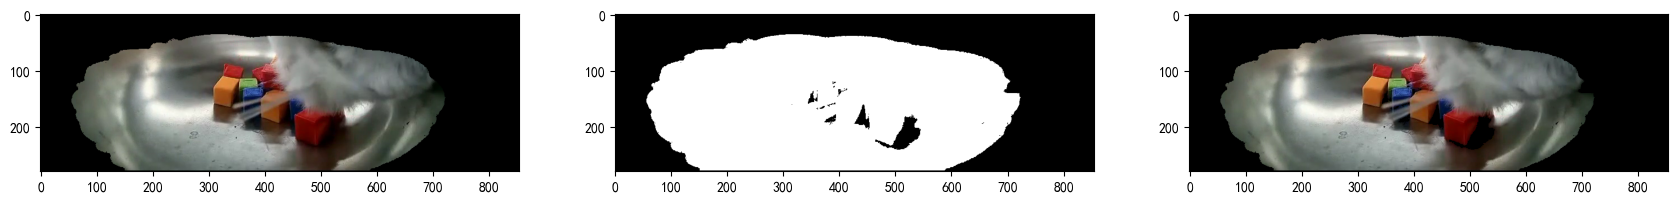

In [105]:
ori_image_std = np.copy(ori_image_with_mask)
img_sum = np.sum(ori_image_std, axis=2)
std_img = np.std(ori_image_std)

std_img = np.where(img_sum<50, 0, 255)
std_img = std_img.astype(np.uint8)
# _,std_img = cv2.threshold(std_img, 200,255,cv2.THRESH_BINARY)
print(std_img.dtype, ori_image_with_mask.dtype)
image_remove_shaddow = cv2.bitwise_and(ori_image_with_mask, ori_image_with_mask, mask=std_img)
plt.figure(figsize=(21,7))
plt.subplot(131)
plt.imshow(ori_image_with_mask)
plt.subplot(132)
plt.imshow(std_img, 'gray')
plt.subplot(133)
plt.imshow(image_remove_shaddow)
plt.show()

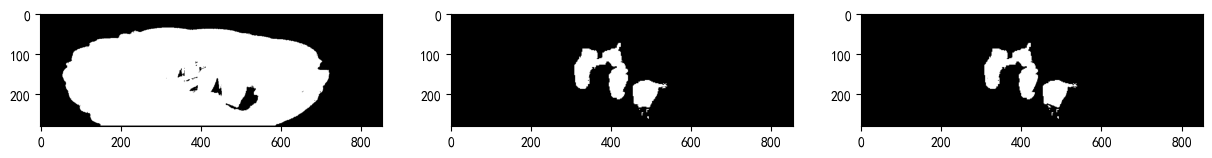

In [106]:
final_mask = np.zeros_like(mask_new_image[:,:,0])
for i in range(final_mask.shape[0]):
    for j in range(final_mask.shape[1]):
        if std_img[i,j] > 0 and mask_new_image[:,:,0][i,j]>0 :
            final_mask[i,j] = 255
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(std_img, 'gray')

plt.subplot(132)
plt.imshow(mask_new_image[:,:,0],'gray')

plt.subplot(133)
plt.imshow(final_mask, 'gray')
plt.show()

midval: 93.0
midval: 97.0
midval: 92.0


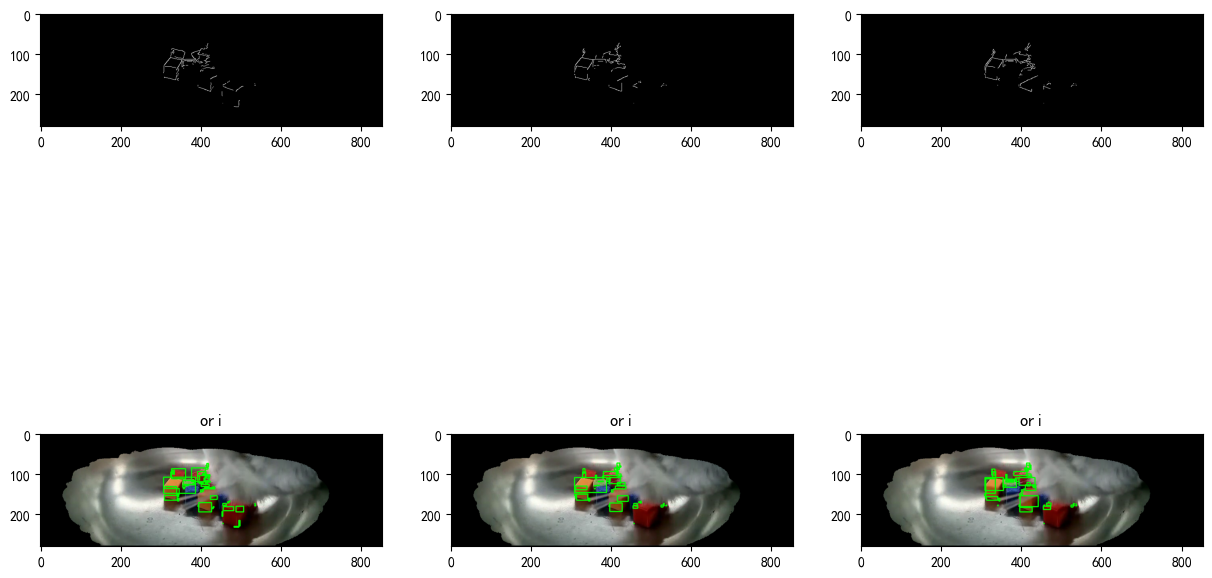

In [107]:
image1 = frame2[200:,:,:]
image1_GaussianBlur = cv2.GaussianBlur(image1, (5,5), 0)
# 求自适应阈值的最小和最大值
def GetMatMinMaxThreshold(img, sigma=0.2):

    midval = np.median(img)
    print("midval:", midval)
    # 计算低阈值
    minval = int((1.0 - sigma) * midval)
    # 计算高阈值
    maxval = int((1.0 + sigma) * midval)
    return minval ,maxval

plt.figure(figsize=(15,10))
for i in range(3):
    image_single_channel = image1_GaussianBlur[:,:,i]
    minval, maxval = GetMatMinMaxThreshold(image_single_channel)   
    Canny2_image_single_channel=cv2.Canny(image_single_channel,minval,maxval) 
    # Canny2_image_single_channel = cv2.bitwise_and(Canny2_image_single_channel, Canny2_image_single_channel, mask=mask_new_image[:,:,0])
    
    # Canny2_image_single_channel = cv2.bitwise_and(Canny2_image_single_channel, Canny2_image_single_channel, mask=std_img)
    Canny2_image_single_channel = cv2.bitwise_and(Canny2_image_single_channel, Canny2_image_single_channel, mask=final_mask)
    plt.subplot(230+i+1)
    plt.imshow(Canny2_image_single_channel, 'gray')

    contours, hierarchy = cv2.findContours(Canny2_image_single_channel, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    ori_image_with_mask_temp = np.copy(ori_image_with_mask)

    for c in contours:
        # 找到边界坐标
        x, y, w, h = cv2.boundingRect(c)  # 计算点集最外面的矩形边界

        small_box = ori_image_with_mask_temp[x:x+w,y:y+h,:]

        cv2.rectangle(ori_image_with_mask_temp, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # 找面积最小的矩形
        rect = cv2.minAreaRect(c)
        # 得到最小矩形的坐标
        box = cv2.boxPoints(rect)
        # 标准化坐标到整数
        box = np.int0(box)
        # 画出边界
        # cv2.drawContours(ori_image_with_mask, [box], 0, (0, 0, 255), 3)
        # 计算最小封闭圆的中心和半径
        (x, y), radius = cv2.minEnclosingCircle(c)
        # 换成整数integer
        center = (int(x),int(y))
        radius = int(radius)
        # 画圆
        # cv2.circle(ori_image_with_mask, center, radius, (0, 255, 0), 2)
    plt.subplot(230+i+4)
    plt.imshow(ori_image_with_mask_temp)
    plt.title('ori')
plt.show()
